In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random


In [34]:
# Raw
# 2241 111132121111112631141124111131113612114111 1112 111211222632421512112111363241111411111211 1126 
# 1112 111211222632421512112111363241111411111211 1126 122421141112122126111152241221211126121511 1141
# 1126 122421141112122126111152241221211126121511 1141 222123612242241221211126113411114111112121 1161
# 1141 222123612242241221211126113411114111112121 1161 215112411121223612151341112212126121111222 4121
# 1161 215112411121223612151341112212126121111222 4121 11221263152114111221113611342242122211261224 2114

msgs = [
    "2241111132121111112631141124111131113612114111",
    "11121112112226324215121121113632411114111112111126",
    "1224211411121221261111522412212111261215111141",
    "2221236122422412212111261134111141111121211161",
    "2151124111212236121513411122121261211112224121",
    "112212631521141112211136113422421222112612242114"
]

msgs_flat = "".join(msgs)

msgs_rnd_1 = [ "".join([str(random.randint(1,6)) for _ in range(random.randint(45, 55))]) for _ in range(6) ]

# Messy code for structured random data with rules about sums to 30 then a 6
msgs_rnd_2_all = []
ranges_to_make = 25
for i in range(ranges_to_make):
    while True:
        vals = []
        if i < ranges_to_make:
            while sum(vals) != 30:
                vals = []
                while sum(vals) < 30:
                    vals.append(random.randint(1,5))
        else:
            for i in range(random.randint(4, 8)):
                vals.append(random.randint(1,5))
        vals.append(6)
        msgs_rnd_2_all += vals
        break
msgs_rnd_2 = []
while msgs_rnd_2_all:
    to_take = min(random.randint(45, 55), len(msgs_rnd_2_all))
    msg = "".join([ str(x) for x in msgs_rnd_2_all[:to_take] ])
    msgs_rnd_2.append(msg)
    msgs_rnd_2_all = msgs_rnd_2_all[to_take:]
print(len(msgs_rnd_2))

msgs_rnd = msgs_rnd_2

msgs_rnd_flat = "".join(msgs_rnd)


6


# Split on 6 (SO6)

In [35]:
msgs_s6 = "".join(msgs).split("6")
msgs_s6_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_s6 ]

print(f"{len(msgs_s6)} messages")
print(f"lengths={msgs_s6_lengths}\n")
for msg_len, msg in zip(msgs_s6_lengths, msgs_s6):
    print(f"{msg_len}\t {msg}")


16 messages
lengths=[29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 17]

29	 2241111132121111112
30	 31141124111131113
30	 121141111112111211222
30	 324215121121113
30	 3241111411111211112
30	 12242114111212212
30	 11115224122121112
30	 1215111141222123
30	 1224224122121112
30	 11341111411111212111
30	 1215112411121223
30	 1215134111221212
30	 1211112224121112212
30	 3152114111221113
30	 113422421222112
17	 12242114


In [36]:
# Try it with the random data

msgs_rnd_s6 = "".join(msgs_rnd).split("6")
msgs_rnd_s6_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_rnd_s6 ]

print(f"{len(msgs_rnd_s6)} messages")
print(f"lengths={msgs_rnd_s6_lengths}\n")
for msg_len, msg in zip(msgs_rnd_s6_lengths, msgs_rnd_s6):
    print(f"{msg_len}\t {msg}")


26 messages
lengths=[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 0]

30	 3354523113
30	 12111244253211
30	 332212341423
30	 32111512114242
30	 51322322154
30	 522221142225
30	 531145353
30	 42534543
30	 411232314333
30	 531424425
30	 1444522431
30	 1332551141211
30	 331125322143
30	 4125411534
30	 11122355145
30	 3323153235
30	 41414244222
30	 521544135
30	 45213555
30	 52545315
30	 11242152444
30	 31423233135
30	 244553331
30	 4122134544
30	 51243555
0	 


# Split on 4 (SO4)

In [7]:
msgs_s4 = "".join(msgs).split("4")
msgs_s4_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_s4 ]

print(f"{len(msgs_s4)} messages")
print(f"lengths={msgs_s4_lengths}\n")
for msg_len, msg in zip(msgs_s4_lengths, msgs_s4):
    print(f"{msg_len}\t {msg}")


24 messages
lengths=[4, 32, 4, 24, 32, 32, 4, 24, 4, 32, 32, 24, 4, 24, 4, 32, 32, 32, 32, 24, 4, 24, 4, 0]

4	 22
32	 11111321211111126311
4	 112
24	 11113111361211
32	 1111112111211222632
32	 215121121113632
4	 1111
24	 111112111126122
4	 211
32	 11121221261111522
32	 122121112612151111
24	 12221236122
4	 22
24	 1221211126113
4	 1111
32	 1111121211161215112
32	 111212236121513
32	 1112212126121111222
32	 1211122126315211
24	 1112211136113
4	 22
24	 212221126122
4	 211
0	 


# Semi RLE using SO6

In [37]:
def msgs_to_im(msgs, fill=0):
    ml = max([len(msg) for msg in msgs])
    im = np.zeros((len(msgs), ml), dtype=np.uint8)
    for i, msg in enumerate(msgs):
        for j, x in enumerate(msg):
            im[i, j] = int(x)
        for j in range(len(msg), ml):
            im[i, j] = fill
    return im


In [38]:
def semi_rl_encode(msg):
    return "".join([ c * int(c) for c in msg ])


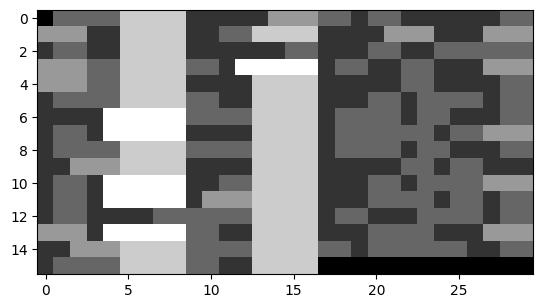

In [39]:
msgs_s6_srle = [ semi_rl_encode(msg) for msg in msgs_s6 ]

im_s6_srle = msgs_to_im(msgs_s6_srle, fill=0)
im_s6_srle[0] = np.roll(im_s6_srle[0], 1)
plt.imshow(im_s6_srle, cmap="gray")
plt.show()

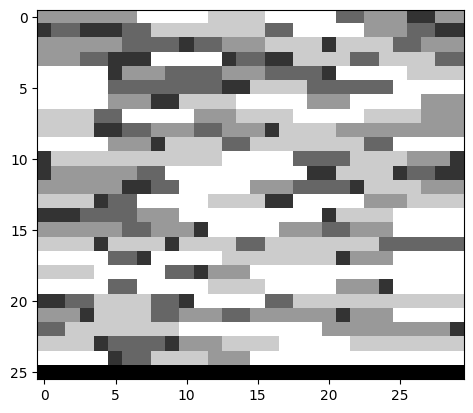

In [40]:
# Try it with the random data

msgs_rnd_s6_srle = [ semi_rl_encode(msg) for msg in msgs_rnd_s6 ]

im_rnd_s6_srle = msgs_to_im(msgs_rnd_s6_srle, fill=0)
im_rnd_s6_srle[0] = np.roll(im_rnd_s6_srle[0], 1)
plt.imshow(im_rnd_s6_srle, cmap="gray")
plt.show()

# RLE using SO6

In [12]:
flip = 1

def rl_decode(msg, reset=True):
    global flip
    if reset: flip = 1
    out = ""
    for c in msg:
        out += int(c) * str(flip)
        flip = 1 - flip
    return out


RL decode on SO6


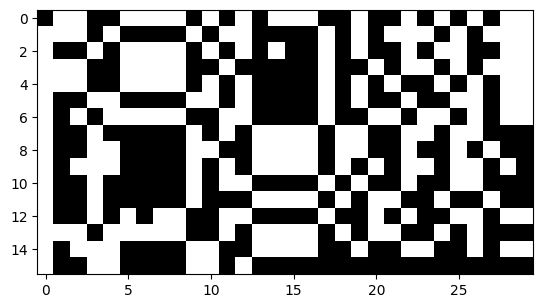

RL decode on SO6 (no reset)


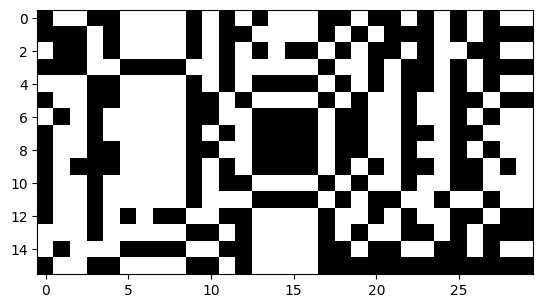

In [13]:
print("RL decode on SO6")

msgs_s6_rle = [ rl_decode(msg) for msg in msgs_s6 ]
im_s6_rle = msgs_to_im(msgs_s6_rle, fill=0)
im_s6_rle[0] = np.roll(im_s6_rle[0], 1)
plt.imshow(im_s6_rle, cmap="gray")
plt.show()

print("RL decode on SO6 (no reset)")

msgs_s6_rle2 = [ rl_decode(msg, False) for msg in msgs_s6 ]
im_s6_rle2 = msgs_to_im(msgs_s6_rle2, fill=0)
im_s6_rle2[0] = np.roll(im_s6_rle2[0], 1)
plt.imshow(im_s6_rle2, cmap="gray")
plt.show()


# SRLE then wrap 36

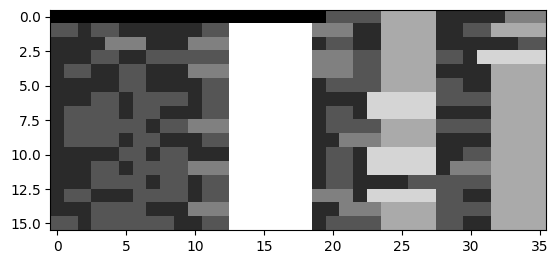

In [41]:
msgs_flat_srle = semi_rl_encode(msgs_flat)

wrap = 36
im_fsrle_wrap36_0 = "0" * (wrap - (len(msgs_flat_srle) % wrap)) + msgs_flat_srle
im_fsrle_wrap36_1 = [ im_fsrle_wrap36_0[i:i+wrap] for i in range(0, len(im_fsrle_wrap36_0), wrap) ]
im_fsrle_wrap36 = msgs_to_im(im_fsrle_wrap36_1, fill=0)

plt.imshow(im_fsrle_wrap36, cmap="gray")
plt.show()


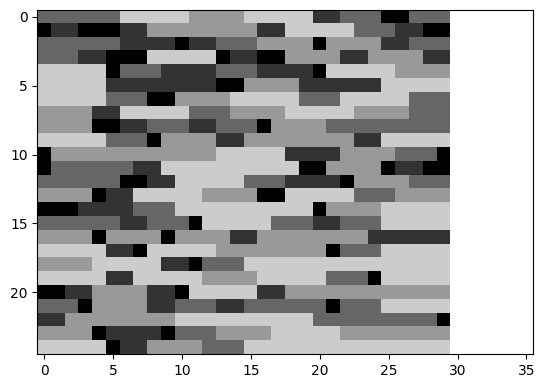

In [44]:
# Try it with the random data

msgs_rnd_flat_srle = semi_rl_encode(msgs_rnd_flat)

wrap = 36
im_rnd_fsrle_wrap36_1 = [ msgs_rnd_flat_srle[i:i+wrap] for i in range(0, len(msgs_rnd_flat_srle), wrap) ]
im_rnd_fsrle_wrap36 = msgs_to_im(im_rnd_fsrle_wrap36_1, fill=0)

plt.imshow(im_rnd_fsrle_wrap36, cmap="gray")
plt.show()


# RLE then wrap 36

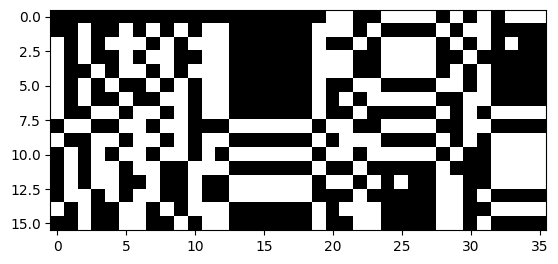

In [16]:
msgs_flat_rle = rl_decode(msgs_flat)

wrap = 36
im_frle_wrap36_0 = "0" * (wrap - (len(msgs_flat_rle) % wrap)) + msgs_flat_rle
im_frle_wrap36_1 = [ im_frle_wrap36_0[i:i+wrap] for i in range(0, len(im_frle_wrap36_0), wrap) ]
im_frle_wrap36 = msgs_to_im(im_frle_wrap36_1, fill=0)

plt.imshow(im_frle_wrap36, cmap="gray")
plt.show()


# Funky N using SO6

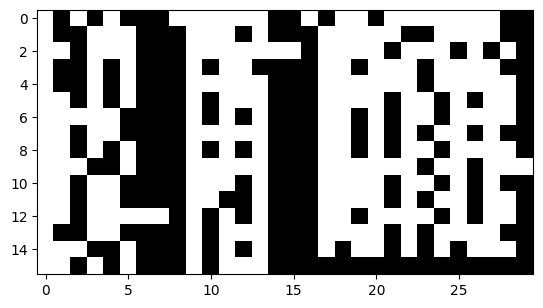

In [17]:
def funkyN(msg):
    return "".join([ ("1" + ("0" * (int(c) - 1))) for c in msg ])

msgs_s6_fn = [ funkyN(msg) for msg in msgs_s6 ]

im_s6_fn = msgs_to_im(msgs_s6_fn, fill=0)
plt.imshow(im_s6_fn, cmap="gray")
plt.show()


# Funky N then wrap 18

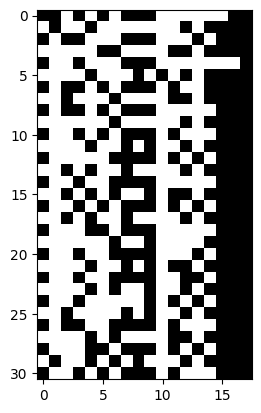

In [45]:
msgs_flat_fn = funkyN(msgs_flat)

wrap = 18
im_flat_fn_wrap18_0 = "0" * (wrap - (len(msgs_flat_fn) % wrap)) + msgs_flat_fn
im_flat_fn_wrap18_1 = [ im_flat_fn_wrap18_0[i:i+wrap] for i in range(0, len(im_flat_fn_wrap18_0), wrap) ]
im_flat_fn_wrap18 = msgs_to_im(im_flat_fn_wrap18_1, fill=0)

plt.imshow(im_flat_fn_wrap18, cmap="gray")
plt.show()
